In [1]:
import pandas as pd
import numpy as np
import warnings
import itertools
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
import statistics as st
warnings.filterwarnings("ignore")


In [2]:
df_times=pd.read_csv('Forecast Weekly Data - Updated Timeline.csv')

In [3]:
df_times

,Renorun SKU,Feb 4,Feb 11,Feb 18,Feb 25,Mar 4,Mar 11,Mar 18,Mar 25,Apr 1,...,May 13,May 20,May 27,Jun 3,Jun 10,Jun 17,Jun 24,Jul 1,Jul 8,Jul 15
0,1401000225,23200,37780,49212,49752,49752,64242,64242,87132,87883,...,98761,92340,88397,82259,79636,74283,74283,66291,63054,60982
1,1401000226,17816,17496,21336,29528,29528,30338,42486,42461,43939,...,48291,46816,46048,44157,43354,42840,42840,40792,39566,38928
2,1101000654,22726,20778,16159,8903,12269,10673,8980,18090,16555,...,27471,22193,16883,29487,25231,29266,29266,16413,14453,43242
3,1401000176,6111,6068,12732,18792,18788,18777,25402,25278,25060,...,26337,25331,24424,23290,22461,21479,21479,19544,18785,17898
4,1101000634,1879,1331,2394,2067,1985,1292,1052,807,169,...,15784,17384,16545,15952,15478,14569,14569,12355,11289,10448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2909005076,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
3192,2909005077,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
3193,2909005078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80
3194,2909005080,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25


In [4]:
df_times.dropna(inplace=True)

In [5]:
dftimes_transposed=df_times.T
new_header2=dftimes_transposed.iloc[0]
dftimes_transposed=dftimes_transposed.iloc[1:]
dftimes_transposed.columns=new_header2

In [6]:
dftimes_transposed=dftimes_transposed.astype(float)

In [7]:
dftimes_transposed

Renorun SKU,1401000225,1401000226,1101000654,1401000176,1101000634,1401000224,1000002653,1401000180,1401000156,1101000651,...,2909005070,2909005071,2909005073,2909005074,2909005075,2909005076,2909005077,2909005078,2909005080,2909005081
Feb 4,23200.0,17816.0,22726.0,6111.0,1879.0,2271.0,378.0,5174.0,721.0,3856.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feb 11,37780.0,17496.0,20778.0,6068.0,1331.0,2271.0,378.0,6142.0,5286.0,2280.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feb 18,49212.0,21336.0,16159.0,12732.0,2394.0,5511.0,378.0,6394.0,7626.0,2240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feb 25,49752.0,29528.0,8903.0,18792.0,2067.0,7671.0,378.0,6630.0,7626.0,3805.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar 4,49752.0,29528.0,12269.0,18788.0,1985.0,9831.0,378.0,7380.0,7626.0,9371.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar 11,64242.0,30338.0,10673.0,18777.0,1292.0,10904.0,358.0,9393.0,7610.0,9677.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar 18,64242.0,42486.0,8980.0,25402.0,1052.0,10904.0,358.0,13500.0,7609.0,8961.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar 25,87132.0,42461.0,18090.0,25278.0,807.0,11844.0,352.0,13484.0,10760.0,7647.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr 1,87883.0,43939.0,16555.0,25060.0,169.0,14354.0,352.0,13383.0,10899.0,5785.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr 8,98454.0,43459.0,33112.0,24609.0,0.0,14315.0,352.0,16566.0,14346.0,4541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Forecasting Model


In [8]:
len(dftimes_transposed.axes[1])

3196

In [9]:
forecast=[]

In [10]:
y_to_train = dftimes_transposed

In [11]:
y_to_train.iloc[:,0]

Feb 4      23200.0
Feb 11     37780.0
Feb 18     49212.0
Feb 25     49752.0
Mar 4      49752.0
Mar 11     64242.0
Mar 18     64242.0
Mar 25     87132.0
Apr 1      87883.0
Apr 8      98454.0
Apr 15    112000.0
Apr 22    114534.0
Apr 29    112846.0
May 6     107180.0
May 13     98761.0
May 20     92340.0
May 27     88397.0
Jun 3      82259.0
Jun 10     79636.0
Jun 17     74283.0
Jun 24     74283.0
Jul 1      66291.0
Jul 8      63054.0
Jul 15     60982.0
Name: 1401000225, dtype: float64

In [12]:
fit2 = ExponentialSmoothing(
  y_to_train.iloc[:,0],
  seasonal_periods=12,
  trend="add",
  seasonal="add",
  ).fit()
cast3= fit2.forecast(90)
#for j in range(len(cast3)):
 #   if (cast3.iloc[j-1] < 0):
  #    cast3.iloc[j-1]=0


In [13]:
plt.figure(figsize=(24,6))

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

In [14]:
cast3

24     -28963.797358
25     -13276.564601
26       -727.088466
27        932.050600
28       2050.269456
           ...      
109     80624.142714
110     93173.618849
111     94832.757916
112     95950.976771
113    111557.188156
Length: 90, dtype: float64

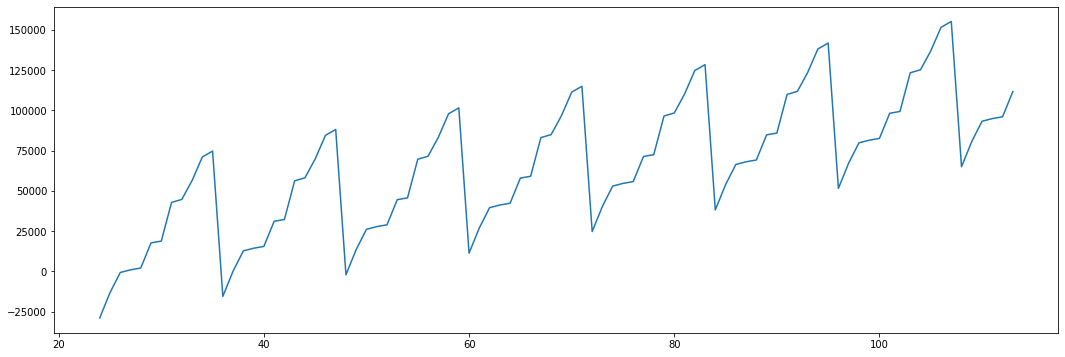

In [15]:
plt.figure(figsize=(18,6))
plt.plot(cast3)

In [16]:
for i in range(len(dftimes_transposed.axes[1])):
  fit1 = ExponentialSmoothing(
    y_to_train.iloc[:,i],
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    ).fit()
  cast2 =  fit1.forecast(60)
  for j in range(len(cast2)):
    if (cast2.iloc[j-1] < 0):
      cast2.iloc[j-1]=0

  forecast.append(cast2)

In [17]:
df3=pd.DataFrame(forecast)

In [18]:
df4=pd.merge(df_times, df3, left_index=True, right_index=True)

In [19]:
df4

,Renorun SKU,Feb 4,Feb 11,Feb 18,Feb 25,Mar 4,Mar 11,Mar 18,Mar 25,Apr 1,...,74,75,76,77,78,79,80,81,82,83
0,1401000225,23200,37780,49212,49752,49752,64242,64242,87132,87883,...,52930.458571,54589.597638,55707.816493,71314.027878,72433.627405,96439.001002,98310.515492,109997.706799,124661.682995,128315.418841
1,1401000226,17816,17496,21336,29528,29528,30338,42486,42461,43939,...,46014.043757,54965.739087,55726.768707,57296.721711,70203.837650,70940.220706,73178.269874,73458.402282,84356.564406,84540.920069
2,1101000654,22726,20778,16159,8903,12269,10673,8980,18090,16555,...,47749.514858,41142.304339,45155.853161,44210.266310,43164.843783,52922.729358,52036.648541,69239.219366,65174.782355,77016.275751
3,1401000176,6111,6068,12732,18792,18788,18777,25402,25278,25060,...,16281.558089,22622.788031,22900.591252,23170.758977,30076.312427,30234.155569,30297.453093,30127.470079,31123.656879,34792.019974
4,1101000634,1879,1331,2394,2067,1985,1292,1052,807,169,...,85.083746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2909005076,0,0,0,0,0,0,0,0,0,...,14.666665,14.666663,14.666660,14.666668,14.666656,14.666646,14.666671,14.666658,14.666659,30.666659
3192,2909005077,0,0,0,0,0,0,0,0,0,...,13.746803,13.746866,13.746948,13.747053,13.747221,13.747422,13.747744,13.748162,13.748695,28.746916
3193,2909005078,0,0,0,0,0,0,0,0,0,...,36.666091,36.666250,36.666401,36.666559,36.666735,36.666891,36.667050,36.667198,36.667360,76.667150
3194,2909005080,0,0,0,0,0,0,0,0,0,...,11.458773,11.458769,11.458760,11.458741,11.458719,11.458689,11.458646,11.458593,11.458515,23.958757


In [ ]:
##from google.colab import auth
##auth.authenticate_user()
##import gspread
##from oauth2client.client import GoogleCredentials as GC
# create, and save df
##from gspread_dataframe import set_with_dataframe
##title = 'Forecast 24 weeks'
##gc.create(title)  # if not exist
##sheet = gc.open(title).sheet1
##set_with_dataframe(sheet, df4) 